In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, StandardScaler

dataset = pd.read_csv('cereal_activity.csv')
dataset.head()

,Unnamed: 0,calories,carbo,sugars
0,0,70,5.0,6
1,1,120,8.0,8
2,2,70,7.0,5
3,3,50,8.0,0
4,4,110,14.0,8


In [14]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

dataset_normalized = normalize(dataset_scaled)
dataset_normalized = pd.DataFrame(dataset_normalized)
dataset_normalized.columns = dataset.columns

dataset.head()

,Unnamed: 0,calories,carbo,sugars
0,0,70,5.0,6
1,1,120,8.0,8
2,2,70,7.0,5
3,3,50,8.0,0
4,4,110,14.0,8


In [15]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
optics_model.fit(dataset_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

In [16]:
l1 = cluster_optics_dbscan(reachability = optics_model.reachability_, core_distances = optics_model.core_distances_, ordering = optics_model.ordering_, eps = 0.5)
l2 = cluster_optics_dbscan(reachability = optics_model.reachability_, core_distances = optics_model.core_distances_,ordering = optics_model.ordering_, eps = 2)

In [17]:
space = np.arange(len(dataset_normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1]


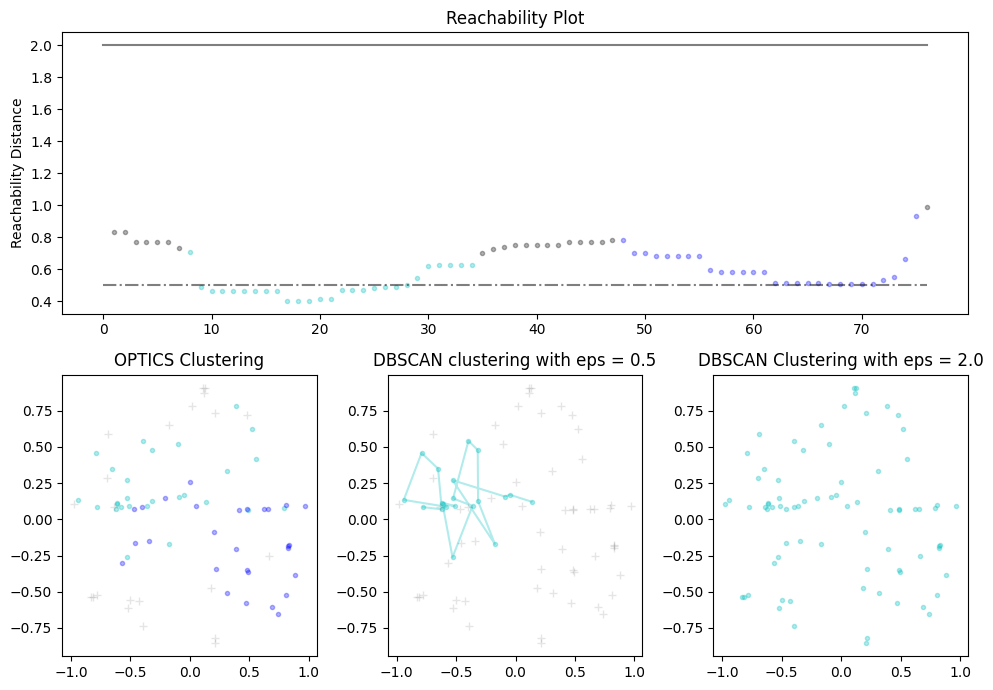

In [26]:
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
a1 = plt.subplot(G[0, :])
a2 = plt.subplot(G[1, 0])
a3 = plt.subplot(G[1, 1])
a4 = plt.subplot(G[1, 2])

colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	datak = space[labels == Class]
	Rk = reachability[labels == Class]
	a1.plot(datak, Rk, colour, alpha = 0.3)
a1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
a1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
a1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
a1.set_ylabel('Reachability Distance')
a1.set_title('Reachability Plot')

colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	datak = dataset_normalized[optics_model.labels_ == Class]
	a2.plot(datak.iloc[:, 0], datak.iloc[:, 1], colour, alpha = 0.3)

a2.plot(dataset_normalized.iloc[optics_model.labels_ == -1, 0], dataset_normalized.iloc[optics_model.labels_ == -1, 1], 'k+', alpha = 0.1)
a2.set_title('OPTICS Clustering')

colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	datak = dataset_normalized[l1 == Class]
	a3.plot(datak.iloc[:, 0], datak.iloc[:, 1], colour, alpha = 0.3, marker ='.')

a3.plot(dataset_normalized.iloc[l1 == -1, 0], dataset_normalized.iloc[l1 == -1, 1], 'k+', alpha = 0.1)
a3.set_title('DBSCAN clustering with eps = 0.5')

colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
	datak = dataset_normalized.iloc[l2 == Class]
	a4.plot(datak.iloc[:, 0], datak.iloc[:, 1], colour, alpha = 0.3)

a4.plot(dataset_normalized.iloc[l2 == -1, 0], dataset_normalized.iloc[l2 == -1, 1],'k+', alpha = 0.1)
a4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()